In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib 
matplotlib.rcParams['font.size'] = 16 # set font size for all plots

In [3]:
df = pd.read_excel('sst.xlsx')
df2 = pd.read_excel('vglut.xlsx')
df3 = pd.read_excel('pv.xlsx')
times = df.iloc[:,0]
column_names = df.columns
datas = df.iloc[:,1:].to_numpy()
datas2 = df2.iloc[:,1:].to_numpy()
datas3 = df3.iloc[:,1:].to_numpy()

In [4]:
zerror = np.std(datas, axis=1)/np.sqrt(np.size(datas, axis=1))
zerror2 = np.std(datas2, axis=1)/np.sqrt(np.size(datas2, axis=1))
zerror3 = np.std(datas3, axis=1)/np.sqrt(np.size(datas3, axis=1))

Text(0.5, 1.0, 'Averaged zscore at Onset')

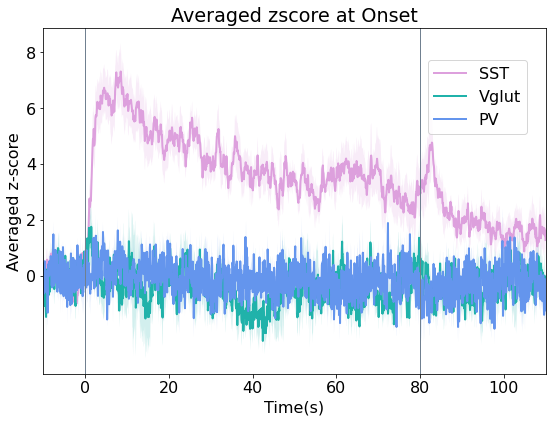

In [6]:
fig = plt.figure(figsize=(9, 14))
ax0 = fig.add_subplot(211)
p1 = ax0.plot(times, np.mean(datas,axis=1), linewidth=2, color='plum', label='SST')
p2 = ax0.fill_between(times, np.mean(datas, axis=1)+zerror
                      ,np.mean(datas, axis=1)-zerror, facecolor='plum', alpha=0.2)
p3 = ax0.plot(times, np.mean(datas2,axis=1), linewidth=2, color='lightseagreen', label='Vglut')
p4 = ax0.fill_between(times, np.mean(datas2, axis=1)+zerror2
                      ,np.mean(datas2, axis=1)-zerror2, facecolor='lightseagreen', alpha=0.2)
p5 = ax0.plot(times, np.mean(datas3,axis=1), linewidth=2, color='cornflowerblue', label='PV')
p6 = ax0.fill_between(times, np.mean(datas3, axis=1)+zerror3
                      ,np.mean(datas3, axis=1)-zerror3, facecolor='cornflowerblue', alpha=0.2)
p7 = ax0.axvline(x=0, linewidth=1, color='slategray', label='Onset')
p8 = ax0.axvline(x=80, linewidth=1, color='slategray', label='Onset')
TRANGE = [-10,110]


lines = p1 + p3 + p5 #line handle for legend
labels = [l.get_label() for l in lines]  #get legend labels
legend = ax0.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.98, 0.93)) #add legend
ax0.set_ylabel('Averaged z-score')
ax0.set_xlabel('Time(s)')
ax0.set_xlim(TRANGE[0], TRANGE[1])
plt.yticks(np.arange(0,10,2))
ax0.set_title('Averaged zscore at Onset')

In [7]:
fig.savefig('cell_population.svg', dpi=600, transparent=True)